# Prediction of bike rental count hourly based on the environmental and seasonal settings.



**Github**: https://github.com/lucaskvz/AI-MACHINE-LEARNING-FOUNDATIONS.git

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import numpy as np




# Exploratory Data Analysis

In [3]:
df = pd.read_csv("data/hour.csv") # This DF is reserved for model training 
dfEDA = df.copy() # This is a copy of the dataframe I will use to do eda I realsied that I should have include this in the beggining 
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# First I want to look at the number of rows and columns
print(f"Dataset Shape:{dfEDA.shape}") 

Dataset Shape:(17379, 17)


**Examine the target variable (cnt) distribution and identify its skewness**

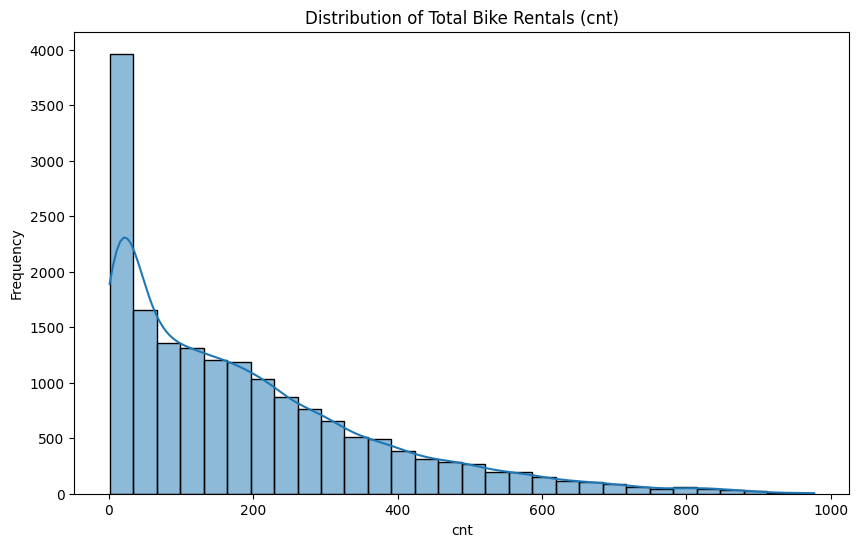

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(dfEDA['cnt'], kde=True, bins=30)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('cnt')
plt.ylabel('Frequency')
plt.show()


What this tells me?
- Most common hourly rental counts where in the low range (200/6 = 33.33) 0-33 or 0-66 up till 200 where it starts to taper off faster
- Fewer hours had higher rentals indicating the data is postivley skewed -> most people rented bikes in small numbers per hour, but sometimes there where peak hours with lots of rentals

What should I do with this information:
- Could possibly look into a log transformation to make the target variable more normally distributed. For linear regression, it better meets assumptions like normality and constant variance. Features would remain the same but relationships become multiplicative. I would need to look into how this would impact the tree based models before proceeding with something like this...

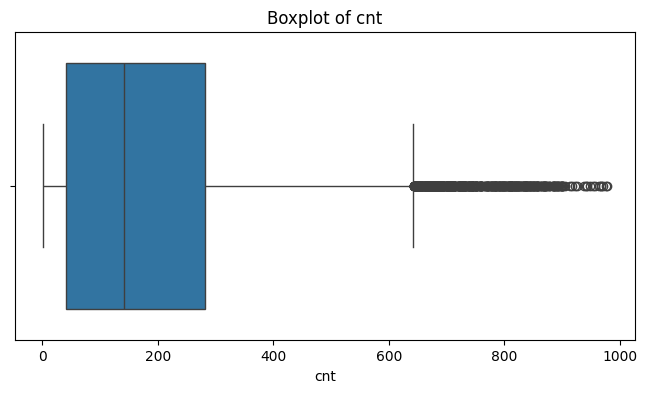

In [6]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=dfEDA['cnt'])
plt.title('Boxplot of cnt')
plt.show()


The boxplot visually supports the earlier histogram: most bike rentals per hour are low, with a long tail of rare high usage hours.

It is important to manage these outliers as they can distor the linear regression model but as I understand it not affect the treebased models too greatly. 

In [7]:
cnt_skew = skew(dfEDA['cnt'])
print(f"Skewness of cnt: {cnt_skew:.2f}")


Skewness of cnt: 1.28


The histogram and boxplot of cnt show a strong right skew, with most hourly bike rental counts concentrated at lower values and a long tail of high values. This visual observation is confirmed by the skewness value of 1.28, indicating moderate - high positive skewness

**Explore analytically the influence of temporal (hr, weekday, mnth, season), binary (holiday, workingday),and weather-related features (temp, atemp, hum, windspeed, weathersit) on cnt**

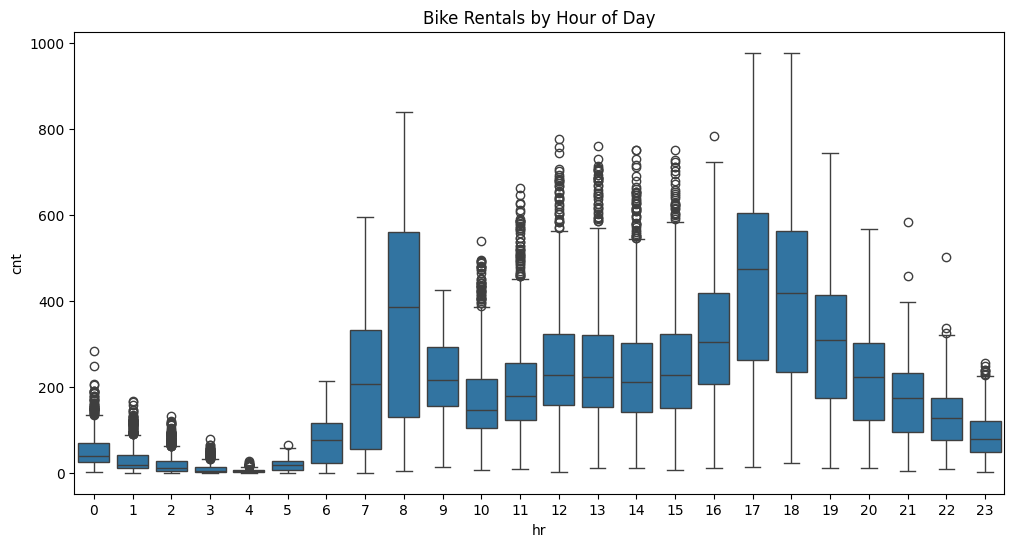

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=dfEDA)
plt.title('Bike Rentals by Hour of Day')
plt.show()


Insights:
- Peak hours: 8 am and 17-18 coinciding with commute times likley
- Late night and early morning show low rentals
- Midday hours have moderate rentals suggesting casual usage likley tourism/non-commute usage

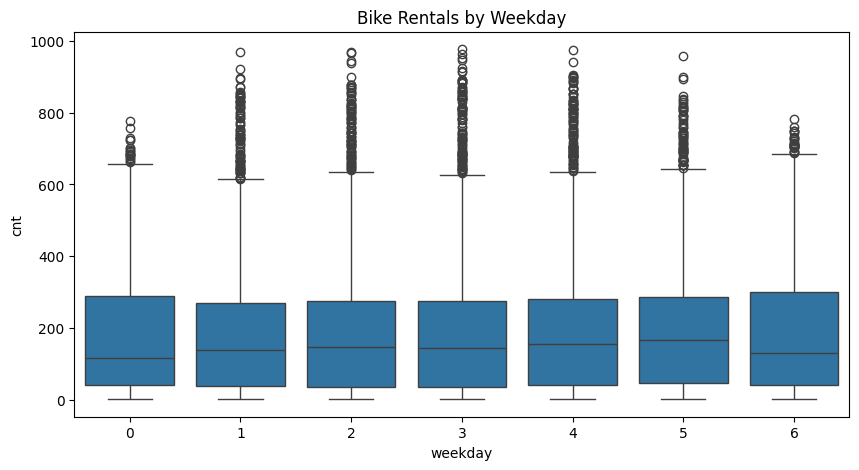

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='weekday', y='cnt', data=dfEDA)
plt.title('Bike Rentals by Weekday')
plt.show()



Take aways:
- Rental patterns are fairly consistent across all weekdays, with no dramatic differences in median or spread
- Weekdays 1-5 have slightly higher medians than weekends suggesting commuting usage
- Presence of consistent outliers across all weekdays reinforces the idea that the hour of the day and external conditions drive spikes more than the day itself

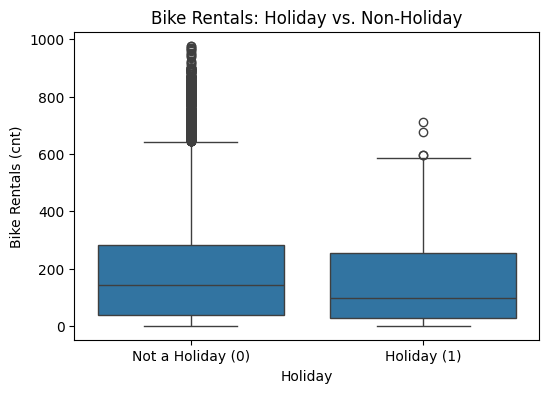

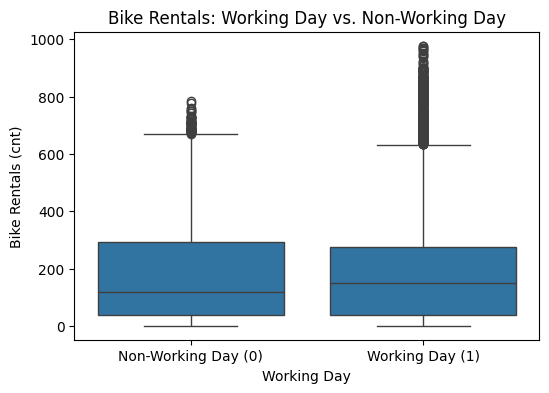

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='holiday', y='cnt', data=dfEDA)
plt.title('Bike Rentals: Holiday vs. Non-Holiday')
plt.xticks([0, 1], ['Not a Holiday (0)', 'Holiday (1)'])  # Custom labels
plt.xlabel('Holiday')
plt.ylabel('Bike Rentals (cnt)')
plt.show()

# Working day plot with clear labels
plt.figure(figsize=(6, 4))
sns.boxplot(x='workingday', y='cnt', data=dfEDA)
plt.title('Bike Rentals: Working Day vs. Non-Working Day')
plt.xticks([0, 1], ['Non-Working Day (0)', 'Working Day (1)'])  # Custom labels
plt.xlabel('Working Day')
plt.ylabel('Bike Rentals (cnt)')
plt.show()


**Holiday vs. Non-Holiday**
- median rentals are slightly lower on holidays (1), suggesting less commuting and more unpredicatble usage
- More outliers exist on non-holidays 
- Insight -> holidays leads to reduced demand due to people possibly staying home or having altered routines

**Working Day vs. Non-Working Day**
- Working days show higher median bike rentals, confirming commuting patterns indicate usage.
- Wider spread on working days, indicating busier and more variable activity
- Insight -> workingday is likley a stronger predictor of bike demand than holiday due to routine behaviors

In [12]:
# Correlation with cnt
weather_features = ['temp', 'atemp', 'hum', 'windspeed']
dfEDA[weather_features + ['cnt']].corr()['cnt'].sort_values(ascending=False)


cnt          1.000000
temp         0.404772
atemp        0.400929
windspeed    0.093234
hum         -0.322911
Name: cnt, dtype: float64

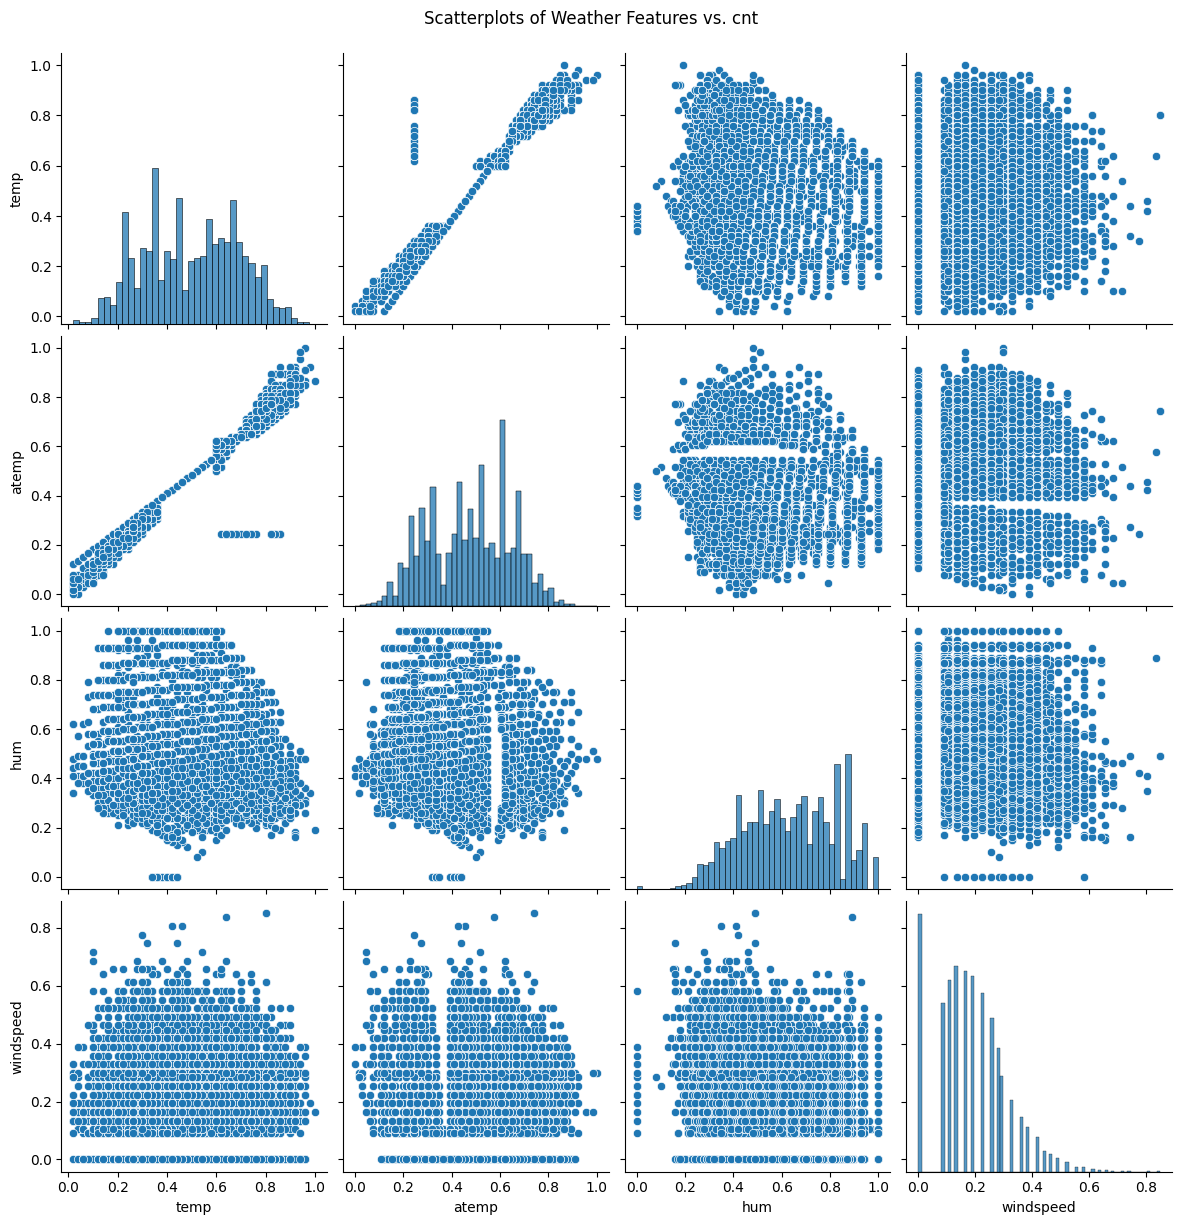

In [13]:
# Scatterplots for continuous weather features
sns.pairplot(dfEDA, vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt', kind='scatter', height=3)
plt.suptitle('Scatterplots of Weather Features vs. cnt', y=1.02)
plt.show()


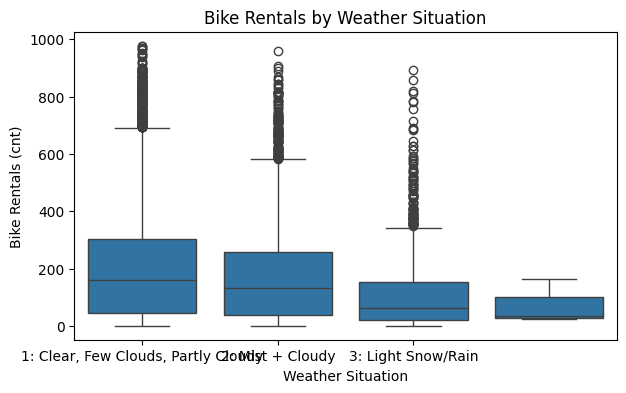

In [19]:
# Categorical weather situation
plt.figure(figsize=(7, 4))
sns.boxplot(x='weathersit', y='cnt', data=dfEDA)
plt.title('Bike Rentals by Weather Situation')
plt.xticks([0, 1, 2], [
    '1: Clear, Few Clouds, Partly Cloudy',
    '2: Mist + Cloudy',
    '3: Light Snow/Rain'
])
plt.xlabel('Weather Situation')
plt.ylabel('Bike Rentals (cnt)')
plt.show()
